In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import time
from sklearn import metrics  
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from  xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from datetime import datetime,timedelta
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# Import libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as pipe_imb
from sklearn.ensemble import RandomForestClassifier as RF
import missingno as msno

import sklearn.decomposition as dec

In [ ]:
df = pd.read_excel('default_of_credit_card_clients.xls',header=1)

df=df.drop(['ID'], axis=1)

df=df.rename(columns={"default payment next month":'default'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


default
0    23364
1     6636
dtype: int64


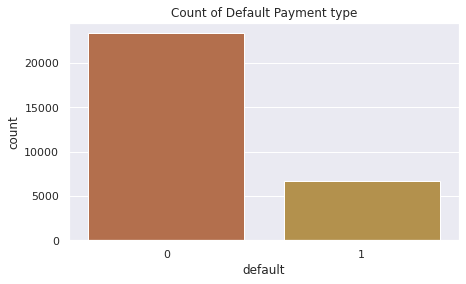

In [ ]:
# ENBALANCED DATA SET
plt.figure(figsize = (7,4))

print(df.groupby('default').size()) # or (df.Churn == True).value_counts()
sns.countplot(df['default'],label="Count", palette="autumn",saturation=0.4, capsize=0.2) # Frequency of Sales
plt.title('Count of Default Payment type')

plt.show()

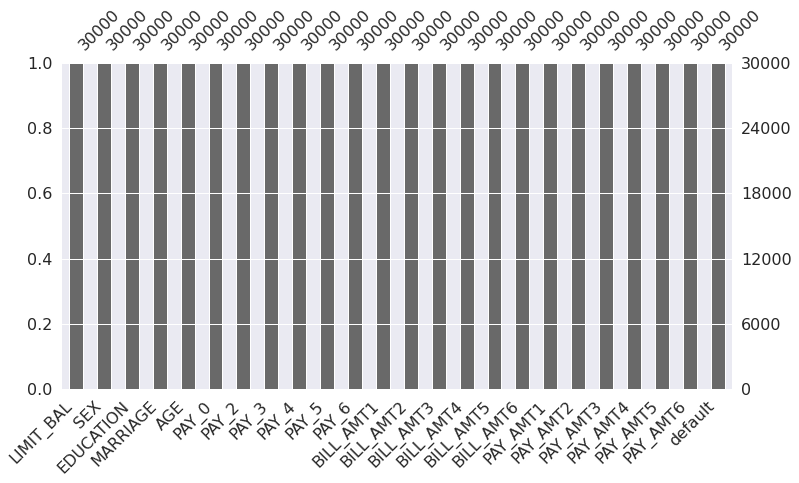

In [ ]:
sns.set()
msno.bar(df, figsize=(12,6));

# LIMIT_BAL

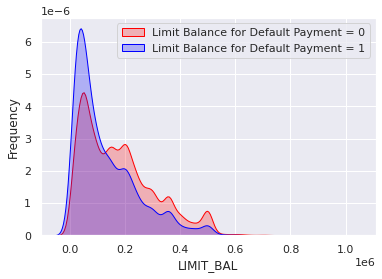

In [ ]:
g = sns.kdeplot(df['LIMIT_BAL'][(df["default"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['LIMIT_BAL'][(df["default"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('LIMIT_BAL')
g.set_ylabel("Frequency")
g = g.legend(["Limit Balance for Default Payment = 0", "Limit Balance for Default Payment = 1"])

# SEX

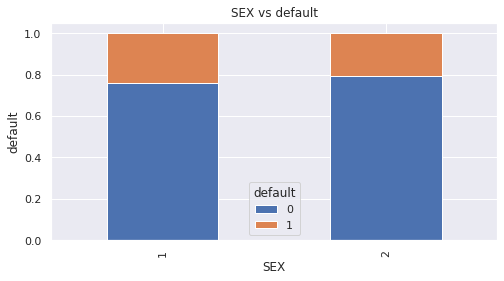

In [ ]:
table=pd.crosstab(df.SEX, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,4), stacked=True)
plt.title('SEX vs default')
plt.xlabel('SEX')
plt.ylabel('default')
plt.show()

In [ ]:
cols_to_transform = ['SEX'] # make a list if more than one column
df = pd.get_dummies(df, columns = cols_to_transform)
df.head(1)

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2
0,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1


In [ ]:
df=df.drop(['SEX_2'], axis=1)
df.head(1)

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1
0,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0


# EDUCATION

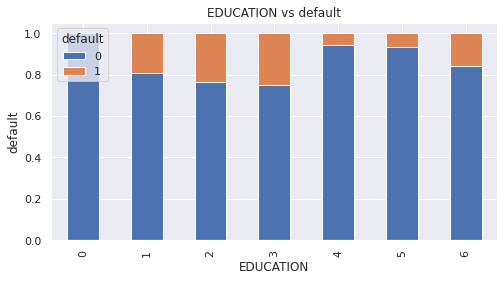

In [ ]:
table=pd.crosstab(df.EDUCATION, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,4), stacked=True)
plt.title('EDUCATION vs default')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

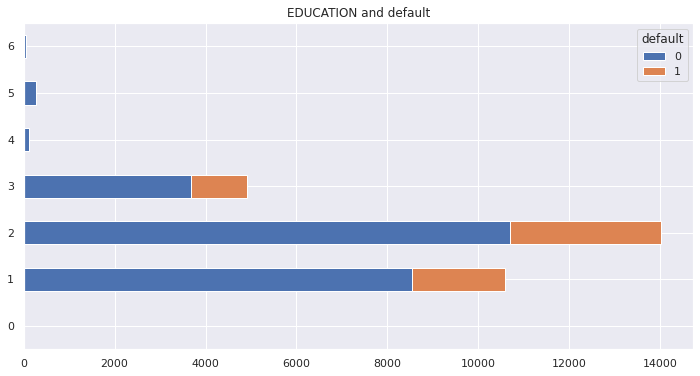

In [ ]:
df['NUMBER'] = 1 
pivot_table = pd.pivot_table(df,values = 'NUMBER',index=['EDUCATION'],columns=['default'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'EDUCATION and default', rot=0)

In [ ]:
df['EDUCATION']= df['EDUCATION'].astype('str')

In [ ]:
PythonDummies = df['EDUCATION'].str.get_dummies(sep=",")
Satisfaction=df["default"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [ 3.976 51.15  21.238 26.336 19.271 40.02   1.225] 

p_values: [4.614e-02 8.559e-13 4.056e-06 2.868e-07 1.134e-05 2.514e-10 2.683e-01] 

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object')


,Feature,p-value
1,1,0.000000
3,3,0.000000
5,5,0.000000
2,2,0.000004
4,4,0.000011
0,0,0.046143
6,6,0.268300


In [ ]:
#df["EDUCATION"]=df["EDUCATION"].replace("0","other")
#df["EDUCATION"]=df["EDUCATION"].replace("4","other")
#df["EDUCATION"]=df["EDUCATION"].replace("5","other")
#df["EDUCATION"]=df["EDUCATION"].replace("6","other")


# MARRIAGE

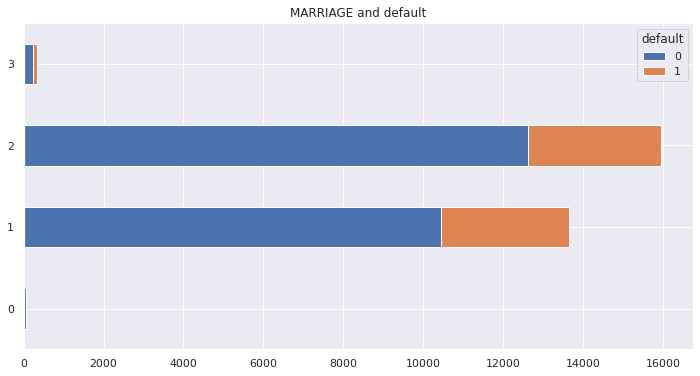

In [ ]:
df['NUMBER'] = 1 
pivot_table = pd.pivot_table(df,values = 'NUMBER',index=['MARRIAGE'],columns=['default'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'MARRIAGE and default', rot=0)


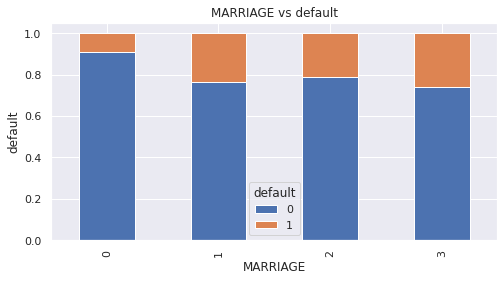

In [ ]:
table=pd.crosstab(df.MARRIAGE, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,4), stacked=True)
plt.title('MARRIAGE vs default')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

In [ ]:
df['MARRIAGE']= df['MARRIAGE'].astype('str')

In [ ]:
PythonDummies = df['MARRIAGE'].str.get_dummies(sep=",")
Satisfaction=df["default"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [ 5.185 14.487 13.159  2.832] 

p_values: [0.023 0.    0.    0.092] 

Index(['0', '1', '2', '3'], dtype='object')


,Feature,p-value
1,1,0.000141
2,2,0.000286
0,0,0.022788
3,3,0.092423


Except for the '2' , '0' and '1' group, the P value for each is greater than 0.05, but also '0' group is very less indicating that the power of separability in each group is weak between the Default state. I prefer to use only 'Is_2' and 'ıs_1'group

In [ ]:
cols_to_transform = ['MARRIAGE'] # make a list if more than one column
df = pd.get_dummies(df, columns = cols_to_transform)


In [ ]:
df.head(1)

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,NUMBER,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
df=df.drop(['MARRIAGE_0', 'MARRIAGE_3'], axis=1)

df.head(3)

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,NUMBER,MARRIAGE_1,MARRIAGE_2
0,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1
2,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1


# AGE

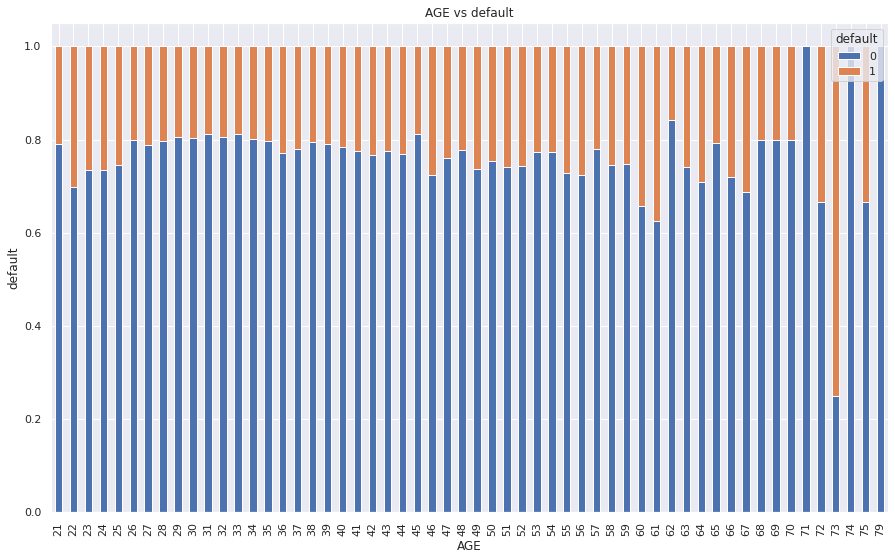

In [ ]:
table=pd.crosstab(df.AGE, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(15,9), stacked=True)
plt.title('AGE vs default')
plt.xlabel('AGE')
plt.ylabel('default')
plt.show()

In [ ]:
df['AGE'].unique()
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

#FOR PAYMENT STATUS

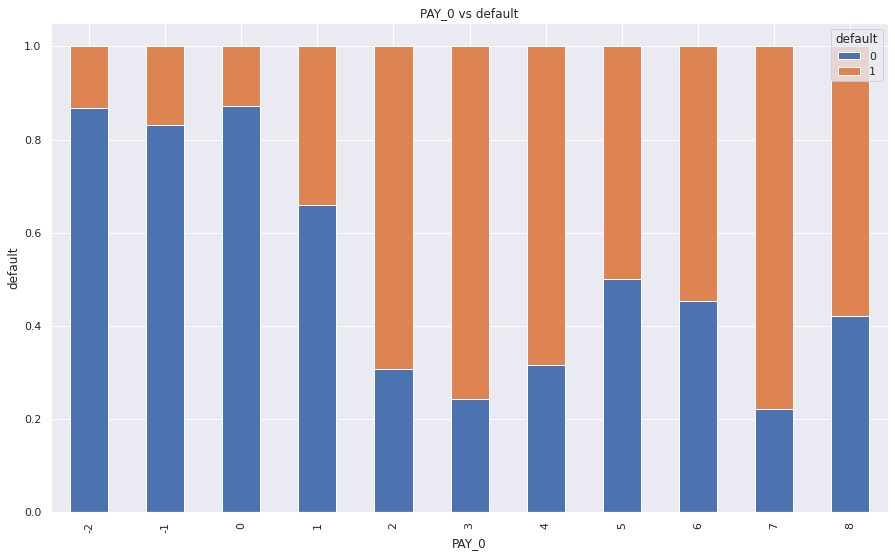

In [ ]:
table=pd.crosstab(df.PAY_0, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(15,9), stacked=True)
plt.title('PAY_0 vs default')
plt.xlabel('PAY_0')
plt.ylabel('default')
plt.show()

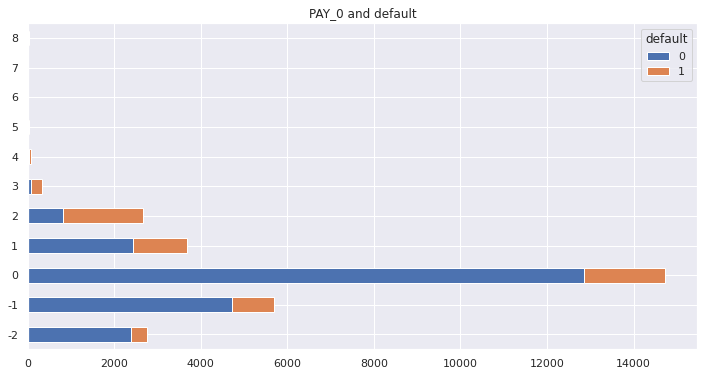

In [ ]:
df['NUMBER'] = 1 
pivot_table = pd.pivot_table(df,values = 'NUMBER',index=['PAY_0'],columns=['default'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'PAY_0 and default', rot=0)


In [ ]:
df['PAY_0'].unique()
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

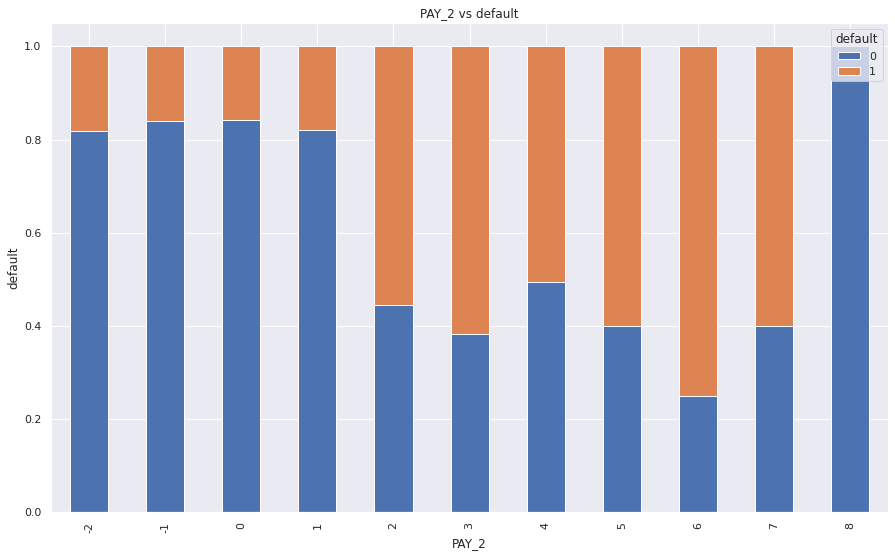

In [ ]:
table=pd.crosstab(df.PAY_2, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(15,9), stacked=True)
plt.title('PAY_2 vs default')
plt.xlabel('PAY_2')
plt.ylabel('default')
plt.show()

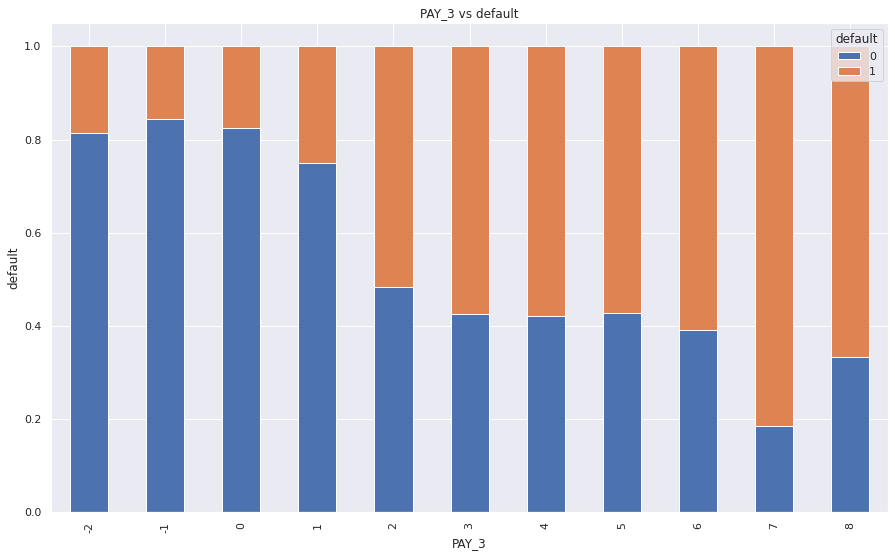

In [ ]:
table=pd.crosstab(df.PAY_3, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(15,9), stacked=True)
plt.title('PAY_3 vs default')
plt.xlabel('PAY_3')
plt.ylabel('default')
plt.show()

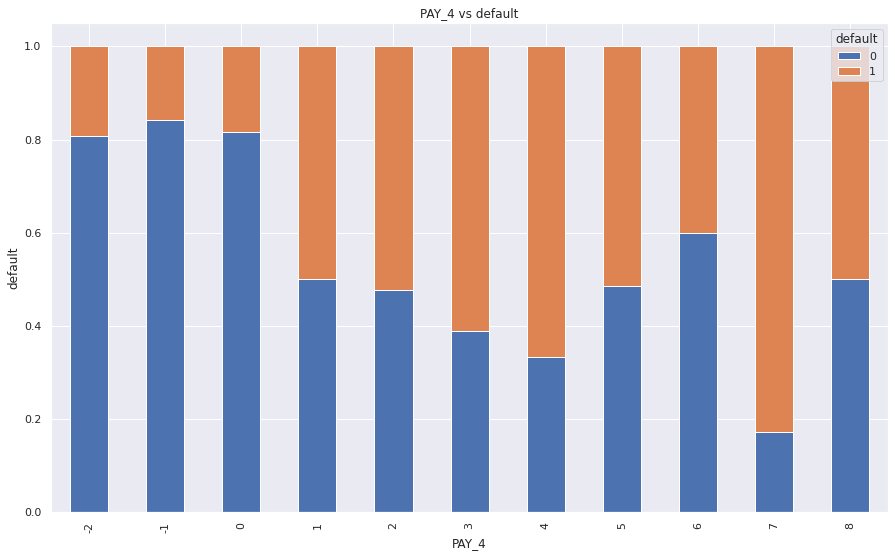

In [ ]:
table=pd.crosstab(df.PAY_4, df.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(15,9), stacked=True)
plt.title('PAY_4 vs default')
plt.xlabel('PAY_4')
plt.ylabel('default')
plt.show()

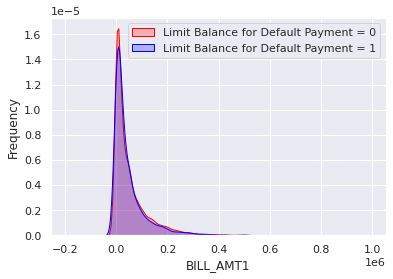

In [ ]:
g = sns.kdeplot(df['BILL_AMT1'][(df["default"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['BILL_AMT1'][(df["default"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('BILL_AMT1')
g.set_ylabel("Frequency")
g = g.legend(["Limit Balance for Default Payment = 0", "Limit Balance for Default Payment = 1"])

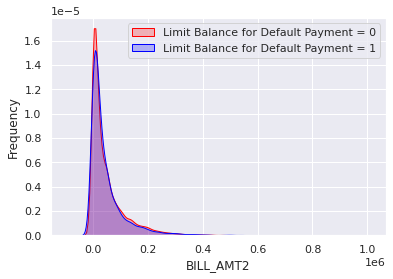

In [ ]:
g = sns.kdeplot(df['BILL_AMT2'][(df["default"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['BILL_AMT2'][(df["default"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('BILL_AMT2')
g.set_ylabel("Frequency")
g = g.legend(["Limit Balance for Default Payment = 0", "Limit Balance for Default Payment = 1"])

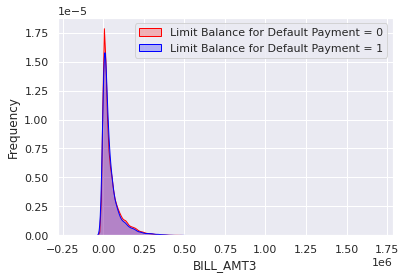

In [ ]:
g = sns.kdeplot(df['BILL_AMT3'][(df["default"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['BILL_AMT3'][(df["default"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('BILL_AMT3')
g.set_ylabel("Frequency")
g = g.legend(["Limit Balance for Default Payment = 0", "Limit Balance for Default Payment = 1"])

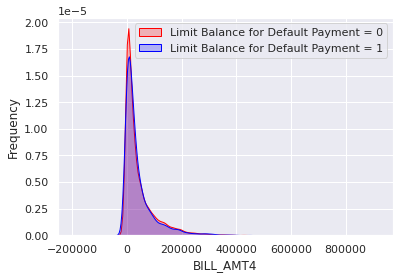

In [ ]:
g = sns.kdeplot(df['BILL_AMT4'][(df["default"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['BILL_AMT4'][(df["default"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('BILL_AMT4')
g.set_ylabel("Frequency")
g = g.legend(["Limit Balance for Default Payment = 0", "Limit Balance for Default Payment = 1"])

In [ ]:
df=df.drop(['NUMBER'], axis=1)

# **MODELLİNG**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LIMIT_BAL   30000 non-null  int64 
 1   EDUCATION   30000 non-null  object
 2   AGE         30000 non-null  int64 
 3   PAY_0       30000 non-null  int64 
 4   PAY_2       30000 non-null  int64 
 5   PAY_3       30000 non-null  int64 
 6   PAY_4       30000 non-null  int64 
 7   PAY_5       30000 non-null  int64 
 8   PAY_6       30000 non-null  int64 
 9   BILL_AMT1   30000 non-null  int64 
 10  BILL_AMT2   30000 non-null  int64 
 11  BILL_AMT3   30000 non-null  int64 
 12  BILL_AMT4   30000 non-null  int64 
 13  BILL_AMT5   30000 non-null  int64 
 14  BILL_AMT6   30000 non-null  int64 
 15  PAY_AMT1    30000 non-null  int64 
 16  PAY_AMT2    30000 non-null  int64 
 17  PAY_AMT3    30000 non-null  int64 
 18  PAY_AMT4    30000 non-null  int64 
 19  PAY_AMT5    30000 non-null  int64 
 20  PAY_AM

**DEFAULT MODEL FOR TREE BASED ALGORITHMS**

In [ ]:
df.EDUCATION = df.EDUCATION.astype('int64')
df.SEX_1 = df.SEX_1.astype('int64')
df.MARRIAGE_1 = df.MARRIAGE_1.astype('int64')
df.MARRIAGE_2 = df.MARRIAGE_2.astype('int64')



In [ ]:
y = df.default
X = df.drop('default', axis=1) #drop column "Price" from the dataset 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [ ]:
seed = 10
tree = DecisionTreeClassifier(random_state=seed)
models = [
    ['DecisionTree', DecisionTreeClassifier(random_state=seed)], 
    ['RandomForest', RandomForestClassifier(n_estimators=100, random_state=seed)], #default changes to 100 in sklearn 0.22
    ['ExtraTrees', ExtraTreesClassifier(n_estimators=100, random_state=seed)],
    ['BaggingClassifier', BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=seed)],
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=seed)], 
    ['GradientBoosting', GradientBoostingClassifier(random_state=seed)],
    ['XGBoost', XGBClassifier(seed=seed)],
    ]

In [ ]:
# Use the following classifiers with their defaults

log_cols=["Classifier", "F1_score"]
log_f1 = pd.DataFrame(columns=log_cols)


print("f1 - score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    log_entry = pd.DataFrame([[abbrv, f1_score(y_test, y_pred)*100]], columns=log_cols)
    log_f1 = log_f1.append(log_entry)
    print('%17s  %5.3f' % (abbrv,f1_score(y_test, y_pred)))
    

print("")
print("recall - score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%17s  %5.3f' % (abbrv,recall_score(y_test, y_pred)))


print("")
print("precision_score - score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('%17s  %5.3f' % (abbrv,precision_score(y_test, y_pred)))
    

f1 - score : 
     DecisionTree  0.408
     RandomForest  0.467
       ExtraTrees  0.451
BaggingClassifier  0.469
         AdaBoost  0.435
 GradientBoosting  0.471
          XGBoost  0.471

recall - score : 
     DecisionTree  0.420
     RandomForest  0.368
       ExtraTrees  0.358
BaggingClassifier  0.373
         AdaBoost  0.321
 GradientBoosting  0.363
          XGBoost  0.360

precision_score - score : 
     DecisionTree  0.396
     RandomForest  0.638
       ExtraTrees  0.610
BaggingClassifier  0.632
         AdaBoost  0.675
 GradientBoosting  0.672
          XGBoost  0.680


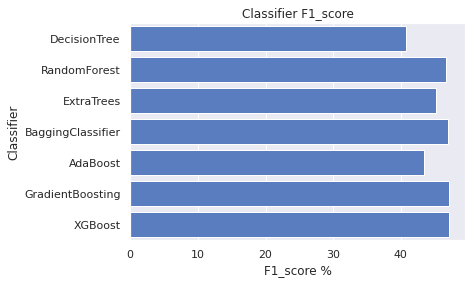

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='F1_score', y='Classifier', data=log_f1, color="b")

plt.xlabel('F1_score %')
plt.title('Classifier F1_score')
plt.show()


In [ ]:
#!pip install pycaret

In [ ]:
#from pycaret.utils import enable_colab
#enable_colab()

In [ ]:
#from pycaret.classification import *
#data_1=setup(data=df,target="default", train_size = 0.66, normalize = True,feature_selection = True)
#best_model=compare_models(n_select = 5)

# **BALANCED**

In [ ]:
# Convert to categorical variables
df.EDUCATION = df.EDUCATION.astype('category')
df.SEX_1 = df.SEX_1.astype('category')
df.MARRIAGE_1 = df.MARRIAGE_1.astype('category')
df.MARRIAGE_2 = df.MARRIAGE_2.astype('category')

# Let's see what the dataframe looks like now:
df.head(3)


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,MARRIAGE_1,MARRIAGE_2
0,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1


In [ ]:
y = df.default
X = df.drop('default', axis=1) #drop column "Price" from the dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [ ]:
# define the transformer for numerical variables
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

# list of numerical features in the data set
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

# define the preprocessor to scale numerical variables and leave categorical ones untouched
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # let anything non-numerical pass through

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
          
          {'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
         ]
scorer = make_scorer(f1_score)

kfold = StratifiedKFold(n_splits = 5, random_state = seed) # train/validation with the same ratio of classes
gridcs = GridSearchCV(pipeline, param_grid = params, cv = kfold, scoring=scorer, verbose = 1, n_jobs = -1)
# Run the grid search 
gridcs.fit(X_train, y_train)
print(gridcs.best_estimator_,'\n')

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   40.3s finished


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                        

In [ ]:
print('Best parameters  :', gridcs.best_params_)

Best parameters  : {'clf__C': 1.1, 'clf__class_weight': {0: 0.5, 1: 1}, 'clf__penalty': 'l1', 'clf__solver': 'saga'}


In [ ]:
print('Train f1:', gridcs.score(X_train, y_train))
print('Test f1 :', gridcs.score(X_test, y_test))


Train f1: 0.5055653192735794
Test f1 : 0.4974596863264855


Confusion Matrix:


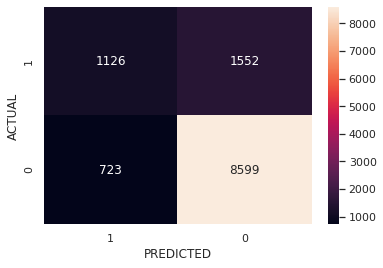

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9322
           1       0.61      0.42      0.50      2678

    accuracy                           0.81     12000
   macro avg       0.73      0.67      0.69     12000
weighted avg       0.79      0.81      0.80     12000



In [ ]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()

predictions = gridcs.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **RANDOM OVER SAMPLER**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomOverSampler(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
          
          {'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
         ]


scorer = make_scorer(f1_score)

kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid1 = GridSearchCV(estimator=ovsmp_pipe, param_grid=params, cv=kfold,scoring=scorer, n_jobs=-1,verbose=1)
grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  3.8min finished


Best grid parameters: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'saga', 'sampler__sampling_strategy': 0.6} 



In [ ]:
print('Train f1:', grid1.score(X_train, y_train))
print('Test f1 :', grid1.score(X_test, y_test))

Train f1: 0.484208467781363
Test f1 : 0.48262828899549354


Confusion Matrix:


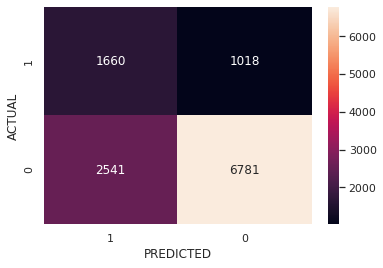

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      9322
           1       0.40      0.62      0.48      2678

    accuracy                           0.70     12000
   macro avg       0.63      0.67      0.64     12000
weighted avg       0.76      0.70      0.72     12000



In [ ]:
predictions = grid1.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **RANDOM UNDER SAMPLER**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
          
          {'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
         ]


scorer = make_scorer(f1_score)

kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid1 = GridSearchCV(estimator=ovsmp_pipe, param_grid=params, cv=kfold,scoring=scorer, n_jobs=-1,verbose=1)
grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  1.7min finished


Best grid parameters: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'saga', 'sampler__sampling_strategy': 0.6} 



In [ ]:
print('Train f1:', grid1.score(X_train, y_train))
print('Test f1 :', grid1.score(X_test, y_test))

Train f1: 0.48637154455828335
Test f1 : 0.4814174589455489


Confusion Matrix:


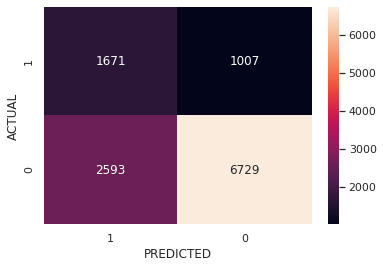

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      9322
           1       0.39      0.62      0.48      2678

    accuracy                           0.70     12000
   macro avg       0.63      0.67      0.64     12000
weighted avg       0.76      0.70      0.72     12000



In [ ]:
predictions = grid1.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **SMOTE**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', SMOTE(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
          
          {'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
         ]


scorer = make_scorer(f1_score)

kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid1 = GridSearchCV(estimator=ovsmp_pipe, param_grid=params, cv=kfold,scoring=scorer, n_jobs=-1,verbose=1)
grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')

In [ ]:
print('Train f1:', grid1.score(X_train, y_train))
print('Test f1 :', grid1.score(X_test, y_test))

Train f1: 0.48637154455828335
Test f1 : 0.4814174589455489


Confusion Matrix:


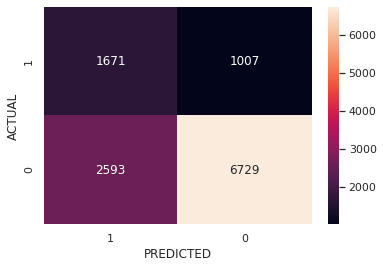

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      9322
           1       0.39      0.62      0.48      2678

    accuracy                           0.70     12000
   macro avg       0.63      0.67      0.64     12000
weighted avg       0.76      0.70      0.72     12000



In [ ]:
predictions = grid1.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **SMOTEENN**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])

params = [{'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
          
          {'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.5,1:1}, 'balanced']},
         ]


scorer = make_scorer(f1_score)

kfold = StratifiedKFold(n_splits=4, random_state=seed)
grid1 = GridSearchCV(estimator=ovsmp_pipe, param_grid=params, cv=kfold,scoring=scorer, n_jobs=-1,verbose=1)
grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed: 21.6min finished


Best grid parameters: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'sampler__sampling_strategy': 0.7} 



In [ ]:
print('Train f1:', grid1.score(X_train, y_train))
print('Test f1 :', grid1.score(X_test, y_test))

Train f1: 0.45853903439042765
Test f1 : 0.4642093345074852


Confusion Matrix:


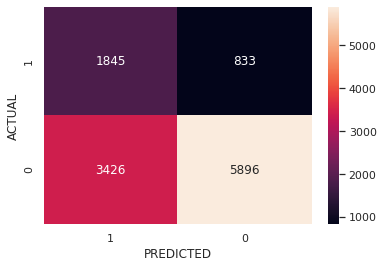

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      9322
           1       0.35      0.69      0.46      2678

    accuracy                           0.65     12000
   macro avg       0.61      0.66      0.60     12000
weighted avg       0.76      0.65      0.67     12000



In [ ]:
predictions = grid1.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **TUNİNG XGBOOST**

In [61]:
df.EDUCATION = df.EDUCATION.astype('int64')
df.SEX_1 = df.SEX_1.astype('int64')
df.MARRIAGE_1 = df.MARRIAGE_1.astype('int64')
df.MARRIAGE_2 = df.MARRIAGE_2.astype('int64')

In [62]:
y = df.default
X = df.drop('default', axis=1) #drop column "Price" from the dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [63]:
model = XGBClassifier(objective='binary:logistic', seed=seed)

param_grid = {'learning_rate'   : [0.03, 0.05],
              'n_estimators':     [80, 100],
              'max_depth'       : [4, 5,],
              'min_child_weight': [3, 4],
              'subsample'       : [0.6, 0.7],
              'colsample_bytree': [0.6, 0.7],
              'gamma'           : [ 0.05, 0.1],
              'reg_alpha'       : [0, 0.1],
              'reg_lambda'      : [0.5, 1]
             }


scorer = make_scorer(f1_score)

grid_search = RandomizedSearchCV(model, param_grid, scoring=scorer, cv=4, n_jobs=-1, verbose=1, n_iter=50)

grid_result = grid_search.fit(X_train, y_train)

print('Train f1:', grid_result.score(X_train, y_train))
print('Test f1 :', grid_result.score(X_test, y_test))



Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.7min finished


Train f1: 0.4868181064500083
Test f1 : 0.46591466405100546


In [65]:
model = XGBClassifier(objective='binary:logistic', seed=seed)

pipe = Pipeline([('scaler', StandardScaler()),('clf',XGBClassifier(random_state=42,early_stopping_rounds=25))])

param_grid = {'clf__learning_rate'   : [0.03, 0.05,0.1,0.3],
              'clf__n_estimators':     [80, 100, 150],
              'clf__max_depth'       : [4, 5,6],
              'clf__min_child_weight': [3, 4,5,6],
              'clf__subsample'       : [0.6, 0.7,0.8],
              'clf__colsample_bytree': [0.6, 0.7],
              'clf__gamma'           : [ 0.05, 0.1],
              'clf__reg_alpha'       : [0, 0.1],
              'clf__reg_lambda'      : [0.5, 1,2,3]
             }


scorer = make_scorer(f1_score)

grid_search = RandomizedSearchCV(pipe, param_grid, scoring=scorer, cv=4, n_jobs=-1, verbose=1, n_iter=50)

grid_result = grid_search.fit(X_train, y_train)

print('Train f1:', grid_result.score(X_train, y_train))
print('Test f1 :', grid_result.score(X_test, y_test))


Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.0min finished


Train f1: 0.49165702957211294
Test f1 : 0.4653441097232428


Confusion Matrix:


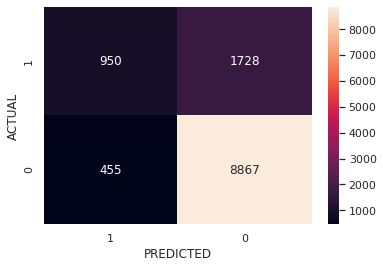

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9322
           1       0.68      0.35      0.47      2678

    accuracy                           0.82     12000
   macro avg       0.76      0.65      0.68     12000
weighted avg       0.80      0.82      0.80     12000



In [66]:
predictions = grid_result.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **XGBOOST WİTH PCA**

In [68]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns.tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

clf = pipe_imb(steps=[('preprocessor', preprocessor),
                      ('sampler', RandomOverSampler(random_state=seed)),  
                      ("pca", dec.PCA(n_components=20, random_state=seed)),  
                      ('classifier', xgb.XGBClassifier(random_state=seed))])

params = {'classifier__learning rate': [0.05, 0.1, 0.2 ],
                  'classifier__n_estimators': [100,200,300],
                  'classifier__subsample':[0.5,0.9,1]
                 }

kfold = StratifiedKFold(n_splits=5, random_state=seed)

scorer = make_scorer(f1_score)

grid_pca = model_selection.GridSearchCV(estimator=clf,param_grid=params,cv=kfold,scoring=scorer,verbose=1,n_jobs=-1)

grid_pca.fit(X_train, y_train)
print('Best grid parameters:', grid_pca.best_params_, '\n')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.8min finished


Best grid parameters: {'classifier__learning rate': 0.05, 'classifier__n_estimators': 100, 'classifier__subsample': 0.5} 



In [69]:
print('Train f1:', grid_pca.score(X_train, y_train))
print('Test f1 :', grid_pca.score(X_test, y_test))

Train f1: 0.5613133794951977
Test f1 : 0.5336211190436659


**The Best f1 score i found is XGBOOST with pca.**

# TUNİNG SVM

In [70]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',SVC(random_state=seed))])

params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5],
           'classifier__class_weight': [{0:0.5,1:1}, 'balanced']}
         ]
kfold = model_selection.KFold(n_splits = 10, random_state=seed)

scorer = make_scorer(f1_score)
grid_search = GridSearchCV(pipeline, params, scoring=scorer, n_jobs=-1, cv=10,verbose=1)


grid_result = grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print('Train f1:', grid_search.score(X_train, y_train))
print('Test f1 :', grid_search.score(X_test, y_test))

print('\n',classification_report(y_test, grid_search.predict(X_test)))
print('\n',classification_report(y_train, grid_search.predict(X_train)))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.5min finished



Best CV score: 0.527708 using {'classifier__C': 5, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

Train f1: 0.5937428111341156
Test f1 : 0.5282627484874676

               precision    recall  f1-score   support

           0       0.87      0.83      0.85      9322
           1       0.49      0.57      0.53      2678

    accuracy                           0.77     12000
   macro avg       0.68      0.70      0.69     12000
weighted avg       0.79      0.77      0.78     12000


               precision    recall  f1-score   support

           0       0.90      0.85      0.87     14042
           1       0.54      0.65      0.59      3958

    accuracy                           0.80     18000
   macro avg       0.72      0.75      0.73     18000
weighted avg       0.82      0.80      0.81     18000



Confusion Matrix:


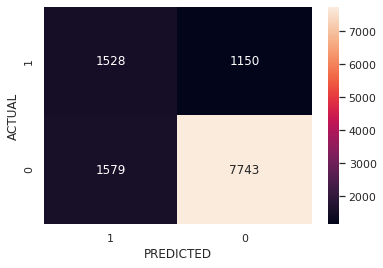

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      9322
           1       0.49      0.57      0.53      2678

    accuracy                           0.77     12000
   macro avg       0.68      0.70      0.69     12000
weighted avg       0.79      0.77      0.78     12000



In [71]:
predictions = grid_search.predict(X_test)
print( "Confusion Matrix:" )
draw_cm( y_test, predictions ) #function defined previously

print( "Classification Report:" )
print( classification_report(y_test, predictions) )

# **Stacking Classifier**

In [72]:
scaler = StandardScaler()

clf1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
clf1.fit(X_train, y_train)

clf2 = SVC()
X_train_scaled = scaler.fit_transform(X_train)
clf2.fit(X_train_scaled, y_train)

clf3 = xgb.XGBClassifier() 
clf3.fit(X_train, y_train)

print('Test score for RF :', f1_score(y_test, clf1.predict(X_test)))
print('Test score for SVC:', f1_score(y_test, clf2.predict(X_test)))
print('Test score for XGBClassifier:', f1_score(y_test, clf3.predict(X_test)))

Test score for RF : 0.22672577580747308
Test score for SVC: 0.0
Test score for XGBClassifier: 0.470703125


In [73]:
# Create Base Learners
base_learners = [
                 ('clf_1', RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)),
                 ('clf_2', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))),
                 ('clf_3', GaussianNB())
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners,
                         final_estimator=LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42),
                         cv=10)

# Extract score
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

f1_score(y_test, clf.predict(X_test))

0.42411958449455284

In [74]:
estimators = [
        ('RFC' ,RandomForestClassifier(n_estimators=500, random_state = 42)),
        ('KNC', KNeighborsClassifier(5)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', SVC(kernel="rbf"))
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier()
)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [75]:
f1_score(y_train, clf.predict(X_train))

0.9940347759868002

In [76]:
f1_score(y_test, clf.predict(X_test))

0.460219151977132